+ EMOTIONS DETECTION IN A TEXT IN PYTHON
  - Importation of libraires
  

In [1]:
import pandas as pd
import numpy as np

In [2]:
# for showing graphes
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## text Cleaning
import neattext.functions as nfx

In [4]:
## load data
df1=pd.read_csv("Emotion_dataset.csv")
df=df1.copy()

In [5]:
## preview 
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
## shape
df.shape

(34792, 2)

In [7]:
## type of data
df.dtypes


Emotion    object
Text       object
dtype: object

In [8]:
## verify is there any NULL values 
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
## values count of Emotions
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

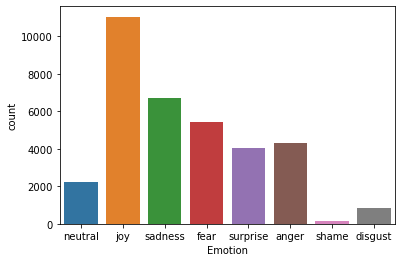

In [10]:
# showing every emotion and it's occurence in the column 'Emotion'
sns.countplot(x='Emotion',data=df)

## Exploration
+ Text Cleaning
+ Sentiment Analysis
+ keyword Extraction
    - Keywords for each emotion
    
    

In [11]:
#installation of textblob (Python library for processing text data)
#pip install -U textblob

In [12]:
# sentiment analysis
from textblob import TextBlob

In [13]:
## a function to return sentiment state in a text usign textblob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result='Positive'
    elif sentiment < 0:
        result='Negative'
    else:
        result='Neutral'
    return result
        

In [14]:
##test the function
get_sentiment('I hate you ')

'Negative'

In [15]:
## add a column to the dataframe in it we apply the function get_sentiment
df["Sentiment"]=df["Text"].apply(get_sentiment)

In [16]:
## verify that the column Sentiment is added successfully
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [17]:
## every emotion and the size of the sentiment corresponding to it
df.groupby(['Emotion','Sentiment']).size()


Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     1532
          Neutral      1846
          Positive     2032
joy       Negative     1682
          Neutral      3649
          Positive     5714
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2629
          Neutral      2128
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

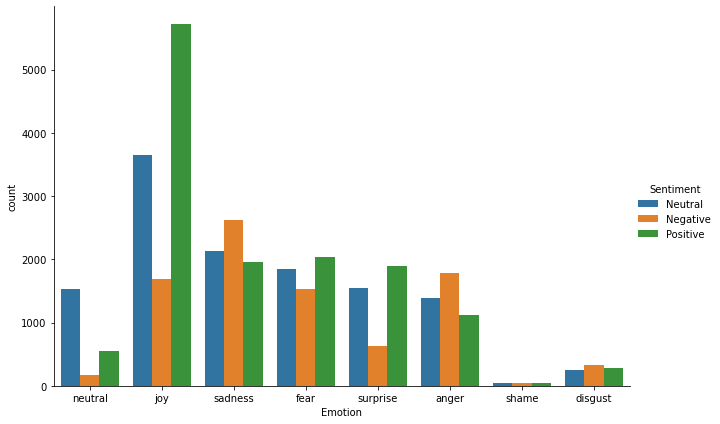

In [18]:
## ploting using seaborn
sns.factorplot
sns.catplot
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5)

## text cleaning
+ remove noise
    - stopwords
    - special characters
    - punctuations
    - emojis
    


In [19]:
# using nfx in neattext.functions library
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
## remove Stopwords
## Stopwords are the most common words in any natural language.
## Generally, the most common words used in a text are “the”, “is”, “in”, “for”,
##“where”, “when”, “to”, “at” etc.
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)


In [21]:
## remove userhandles
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [22]:
## remove punctuations
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [23]:
df.head()

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e...


## keyword Extraction
+ extract most common words per Class of emotion

In [24]:
from collections import Counter

In [25]:
## function that return a dictionnary of the most common word in a text max 25
def extract_keywords(text,num=25):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    ##Counter has a most_common() method that returns a list of tuples 
    ## of (element, count) sorted by counts lkbir l sghir  .
    return dict(most_common_tokens)

In [26]:
##test the function
print(extract_keywords("hi hi how are you you"))

{'hi': 2, 'you': 2, 'how': 1, 'are': 1}


In [27]:
## list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [28]:
## return a list of lines that haves 'Joy' in the column "Emotion" 
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [29]:
## Transform a list to a text(String)
joy_docx=' '.join(joy_list)

In [30]:
## Extract Keywords the most commons that represent joy
keyword_joy=extract_keywords(joy_docx)


In [31]:
keyword_joy
#get dict with count of any word in text in joy emotion

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 331,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 287,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227}

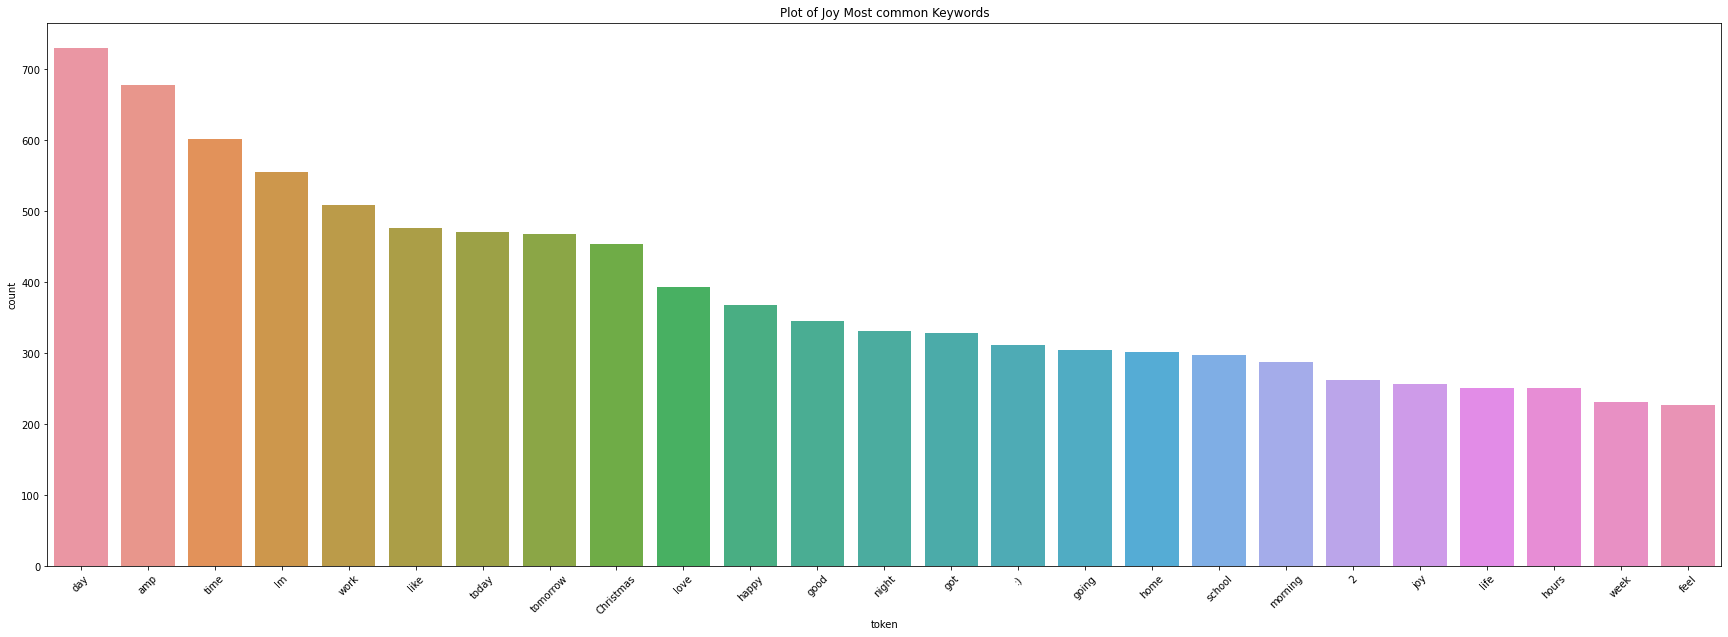

In [32]:
#function to plot most_common_words()
def plot_most_common_words(mydict,emotion_name):
    df_01=pd.DataFrame(mydict.items(),columns=["token","count"])
    plt.figure(figsize=(30,10))
    plt.title("Plot of {} Most common Keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_words(keyword_joy,'Joy')  
    
    

In [33]:
## for surprise emotion 
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
## surprise_doc 
surprise_docx=' '.join(surprise_list)
keyword_surprise=extract_keywords(surprise_docx)

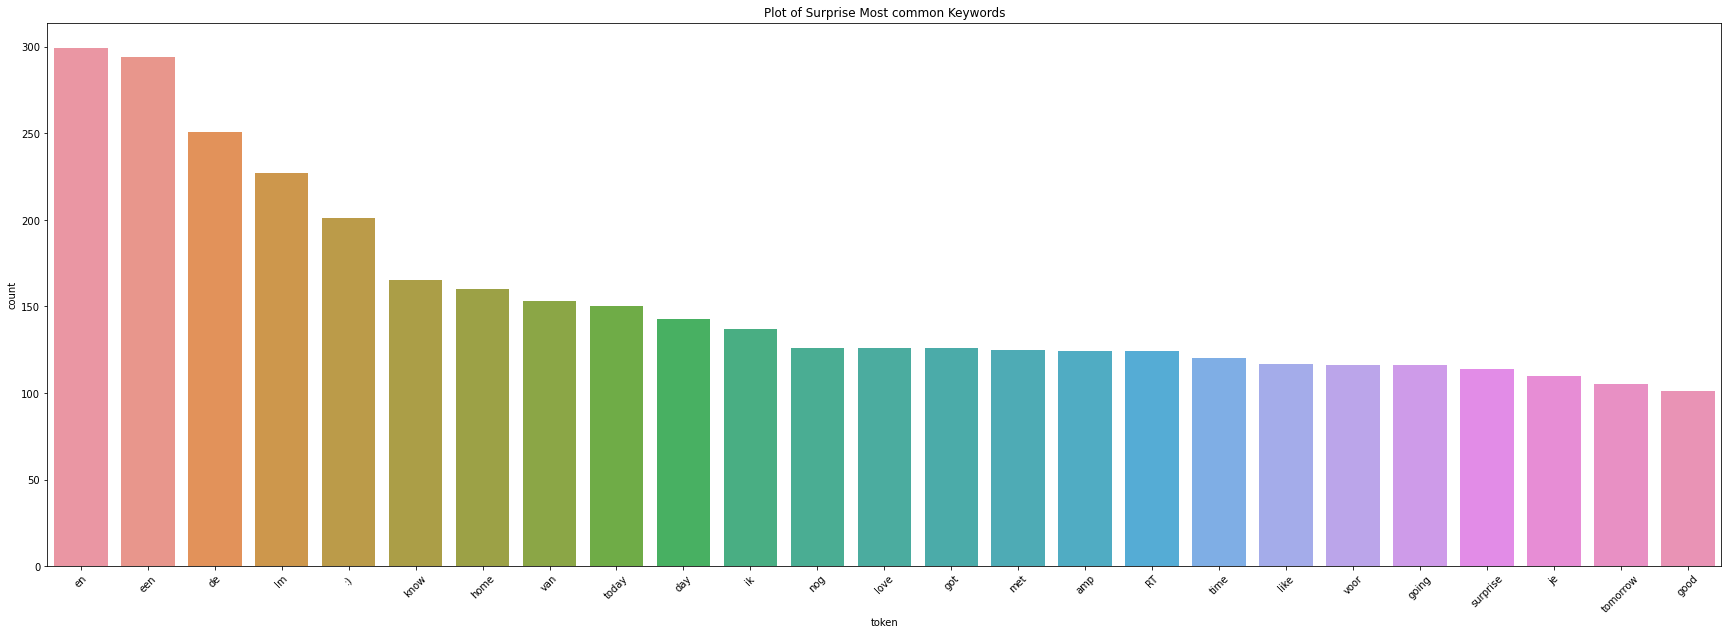

In [34]:
plot_most_common_words(keyword_surprise,'Surprise') 

## machine learning 
+ Naive Bayes
+ LogisticRegression

In [35]:
#load ML packages
from sklearn.naive_bayes import MultinomialNB

In [36]:
# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
##split our DataSet
from sklearn.model_selection import train_test_split

## build Features From our Text

In [38]:
Xfeatures=df['Clean_Text']
ylabels=df['Emotion']

In [39]:
Xfeatures


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [40]:
# vectorrizer
cv = CountVectorizer()
X=cv.fit_transform(Xfeatures)
print(X.shape)






(34792, 34885)


In [41]:
#get Features By name
cv.get_feature_names_out()



array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [42]:
#split Dataset
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)


## Build Our Model

In [43]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)


MultinomialNB()

In [44]:
# Accurasy
nv_model.score(X_test,y_test)

0.5643801494539183

In [45]:
## Predictions
Y_pred_for_nv=nv_model.predict(X_test)

In [46]:
Y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

## make a single predection
+ Vectorized our Text
+ Applied our Model

In [47]:
vect = cv.transform(["hi hate love"]).toarray()

In [48]:
## make prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [49]:
## get all class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [50]:
## check for the Prediction Probabiity(percentage)/confidence Score
##each case represent the pourcentage of a feeling 
nv_model.predict_proba(vect)

array([[3.43672690e-02, 1.19708275e-03, 1.42226270e-01, 5.89869147e-01,
        2.89037427e-03, 1.73580643e-01, 1.52755371e-06, 5.58676866e-02]])

In [51]:
## max value that represent the felling
np.max(nv_model.predict_proba(vect))

0.5898691465757856

In [52]:
## fonction that return a dictionnary with the percentage of chaque mode
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
  
    pred_proba=model.predict_proba(myvect)
    
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{} , Prediction Score : {}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [58]:
predict_emotion(["i hate"],nv_model)

Prediction:anger , Prediction Score : 0.29758092140397413


{'anger': 0.29758092140397413,
 'disgust': 0.026796543056461918,
 'fear': 0.1798958196815806,
 'joy': 0.1739089367866644,
 'neutral': 0.002410648611618673,
 'sadness': 0.2684010908963036,
 'shame': 0.00036197595811544137,
 'surprise': 0.05064406360528087}